In [ ]:
import pandas as pd

In [ ]:
ANG_measles_central= pd.read_csv('/content/ANG_measles_central (3).csv')

<ipython-input-2-16444cfd8277>:1: DtypeWarning: Columns (4,5,6,7,9,20,23,24,25,28,30,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ANG_measles_central= pd.read_csv('/content/ANG_measles_central (3).csv')


In [ ]:
ANG_measles_central.shape

(137116, 108)

In [ ]:
# Assuming columns_list is already defined
columns_list = ANG_measles_central.columns.tolist()

# Display the list of columns with their indices in vertical format
print("Index - Column Name")
for index, column in enumerate(columns_list):
    print(f"{index} - {column}")



Index - Column Name
0 - inoutpatient
1 - outcome
2 - finalclassification
3 - provinceofresidence
4 - datesentformtodistrict
5 - datespecimencollected
6 - datespecimensenttolab
7 - datelabreceivedspecimen
8 - specimencondition
9 - dateofbirth
10 - ageinyears
11 - ageinmonths
12 - sex
13 - patientsresidence
14 - district_name
15 - towncity
16 - urbanrural
17 - dateseenhealthfacility
18 - numberofvaccinedoses
19 - datehealthfacilitynotified
20 - dateoflastvaccination
21 - measlesigm
22 - rubellaigm
23 - datelabsentresulttodistrict
24 - age
25 - datedistrictreclabresults
26 - reportinghealthfacility
27 - idnumber
28 - daterecformdistrict
29 - datereceivednatlevel
30 - namesofpatient
31 - datatype
32 - yronset
33 - uniquekey1
34 - diseasecondition
35 - specimensource
36 - countrycode
37 - dateofonset
38 - ward
39 - fever
40 - generalizedrash
41 - cough
42 - runningnose
43 - redeyes
44 - swollenlymphnodes
45 - jointpain
46 - province_name
47 - year
48 - month
49 - hpv1
50 - hpv2
51 - hpv3
52

In [ ]:
import pandas as pd
ANG_measles_central_coordinates= pd.read_csv('/content/ANG_measles_central_coordinates.csv')

<ipython-input-8-2df2a501ecdd>:2: DtypeWarning: Columns (4,5,6,7,9,20,23,24,25,28,30,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ANG_measles_central_coordinates= pd.read_csv('/content/ANG_measles_central_coordinates.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = ANG_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
ANG_measles_central_coordinates =ANG_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
ANG_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 145/145 [01:39<00:00,  1.46it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0.0,0.0,0.0,60.0,129.0,0.0,0.0,0.0,-8.823224,15.489577
1,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0.0,0.0,0.0,8.0,21.0,0.0,0.0,0.0,-8.823224,15.489577
2,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0.0,0.0,0.0,208.0,565.0,0.0,0.0,0.0,-8.823224,15.489577
3,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0.0,0.0,0.0,61.0,91.0,0.0,0.0,0.0,-8.823224,15.489577
4,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,-8.823224,15.489577


Downloading the dataset

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
ANG_measles_central_coordinates.to_csv('ANG_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('ANG_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ANG_measles_central_coordinates['year'].unique()

array([2023, 2024])


**2. Add Environmental Data:**


In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
        # Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://archive-api.open-meteo.com/v1/archive"     # URL for Open-Meteo historical weather API

def fetch_weather_for_location_2023(lat, lon): # Function to fetch weather data 2023
    params = {
        "latitude": lat,  "longitude": lon,
        "start_date": "2023-01-01",  "end_date": "2023-12-31",
        "hourly": ["temperature_2m", "relative_humidity_2m"],
        "temporal_resolution": "native",
        "timezone": "auto",   }
    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]
        # Process hourly data
        hourly = response.Hourly()
        hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
        hourly_humidity_2m = hourly.Variables(1).ValuesAsNumpy()

        # Get the best (maximum) temperature and corresponding humidity for the location
        best_temperature = hourly_temperature_2m.max()
        best_humidity = hourly_humidity_2m.mean()

        return best_temperature, best_humidity

    except Exception as e:
        print(f"Error fetching weather data for {lat}, {lon}: {e}")
        return None

def integrate_weather_2023(df):
    """
    Iterate through the dataset and fetch the best temperature and humidity for each latitude and longitude.
    Append the data to the dataset.
    """
    best_temperatures = []  # List to store best temperature for each location
    best_humidities = []

    for _, row in df.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        print(f"Fetching weather data for lat={lat}, lon={lon}")

        # Fetch the best temperature and humidity for each location
        result = fetch_weather_for_location_2023(lat, lon)

        # Check if result is None before unpacking
        if result is not None:
            best_temp, best_humidity = result
            best_temperatures.append(best_temp)
            best_humidities.append(best_humidity)
        else:
            # Handle the case where fetch_weather_for_location returns None
            print(f"Could not fetch weather data for lat={lat}, lon={lon}. Using NaN.")
            best_temperatures.append(float('nan')) # or any other default value
            best_humidities.append(float('nan')) # or any other default value

    # Add the best temperature and humidity as new columns in the original DataFrame
    df["best_temperature_2m"] = best_temperatures
    df["best_humidity_2m"] = best_humidities

    return df

# Assuming you already have the ANG_measles_central_coordinates DataFrame with 'Latitude' and 'Longitude' columns
# Apply the weather integration to ANG_measles_central_coordinates
ANG_measles_central_coordinates_weather= integrate_weather_2023(ANG_measles_central_coordinates)

# Display the updated DataFrame with weather data
print(ANG_measles_central_coordinates_weather.head())


Streaming output truncated to the last 5000 lines.
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for lat=-10.164108799141, lon=21.4197004855
Fetching weather data for

In [ ]:
ANG_measles_central_coordinates_weather.head()

,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0,60,129,0,0,0,-8.823224,15.489577,31.3825,79.76234
1,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0,8,21,0,0,0,-8.823224,15.489577,31.3825,79.76234
2,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0,208,565,0,0,0,-8.823224,15.489577,31.3825,79.76234
3,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0,61,91,0,0,0,-8.823224,15.489577,31.3825,79.76234
4,2.0,NaN,2.0,cuanza norte,NaN,2023-06-12 00:00:00,NaN,NaN,NaN,2009-07-30 00:00:00,...,0,2,5,0,0,0,-8.823224,15.489577,31.3825,79.76234


In [ ]:
ANG_measles_central_coordinates_weather.shape

(137116, 112)

In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
ANG_measles_central_coordinates_weather.to_csv('ANG_measles_central_coordinates_weather.csv', index=False)

# Download the file to your local machine
files.download('ANG_measles_central_coordinates_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ANG_measles_central_coordinates_weather= pd.read_csv('/content/ANG_measles_central_coordinates_weather.csv')
# Assuming columns_list is already defined
columns_list = ANG_measles_central_coordinates_weather.columns.tolist()

# Display the list of columns with their indices in vertical format
print("Index - Column Name")
for index, column in enumerate(columns_list):
    print(f"{index} - {column}")



<ipython-input-9-e6d8552d15a4>:1: DtypeWarning: Columns (4,5,6,7,9,20,23,24,25,28,30,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ANG_measles_central_coordinates_weather= pd.read_csv('/content/ANG_measles_central_coordinates_weather.csv')


Index - Column Name
0 - inoutpatient
1 - outcome
2 - finalclassification
3 - provinceofresidence
4 - datesentformtodistrict
5 - datespecimencollected
6 - datespecimensenttolab
7 - datelabreceivedspecimen
8 - specimencondition
9 - dateofbirth
10 - ageinyears
11 - ageinmonths
12 - sex
13 - patientsresidence
14 - district_name
15 - towncity
16 - urbanrural
17 - dateseenhealthfacility
18 - numberofvaccinedoses
19 - datehealthfacilitynotified
20 - dateoflastvaccination
21 - measlesigm
22 - rubellaigm
23 - datelabsentresulttodistrict
24 - age
25 - datedistrictreclabresults
26 - reportinghealthfacility
27 - idnumber
28 - daterecformdistrict
29 - datereceivednatlevel
30 - namesofpatient
31 - datatype
32 - yronset
33 - uniquekey1
34 - diseasecondition
35 - specimensource
36 - countrycode
37 - dateofonset
38 - ward
39 - fever
40 - generalizedrash
41 - cough
42 - runningnose
43 - redeyes
44 - swollenlymphnodes
45 - jointpain
46 - province_name
47 - year
48 - month
49 - hpv1
50 - hpv2
51 - hpv3
52

In [ ]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d62403aa7b55df90f1f00d18623283ce1d97a475461045ed1b8f817909e344db
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

<ipython-input-12-19f62a0f2787>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Load your dataset
ANG_measles_central_coordinates_weather = pd.read_csv("ANG_measles_central_coordinates_weather.csv")

<ipython-input-13-25bbed6cc086>:2: DtypeWarning: Columns (4,5,6,7,9,20,23,24,25,28,30,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ANG_measles_central_coordinates_weather = pd.read_csv("ANG_measles_central_coordinates_weather.csv")


In [ ]:

# Step A: Summary Statistics
summary_stats = ANG_measles_central_coordinates_weather.describe()
summary_stats

,inoutpatient,outcome,finalclassification,specimencondition,ageinyears,ageinmonths,numberofvaccinedoses,measlesigm,rubellaigm,yronset,...,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude,best_temperature_2m,best_humidity_2m
count,136430.000000,84171.000000,137084.000000,46591.000000,136945.000000,125898.000000,137036.000000,52335.000000,52068.000000,67660.000000,...,137116.0,137116.000000,137116.000000,137116.0,137116.0,137116.0,137116.000000,137116.000000,137116.000000,137116.000000
mean,1.720281,4.780079,2.458390,1.005259,5.068519,1.370173,36.568566,2.114111,2.803373,2022.259252,...,0.0,321.671067,460.137635,0.0,0.0,0.0,-9.018867,20.074727,34.941391,68.949695
std,1.501549,3.980990,1.073435,0.072326,6.867721,3.455794,47.503682,1.208533,1.366704,1.759525,...,0.0,336.986104,617.056786,0.0,0.0,0.0,6.779459,16.551012,2.386601,10.793601
min,1.000000,1.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,-17.073531,-88.694962,28.889500,36.444850
25%,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2023.000000,...,0.0,59.000000,34.000000,0.0,0.0,0.0,-11.957653,14.747893,32.857500,64.053480
50%,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,2.000000,2.000000,2023.000000,...,0.0,179.000000,179.000000,0.0,0.0,0.0,-9.656333,16.342190,35.338000,64.206215
75%,2.000000,9.000000,4.000000,1.000000,6.000000,0.000000,99.000000,2.000000,4.000000,2023.000000,...,0.0,530.000000,732.000000,0.0,0.0,0.0,-8.823224,20.390654,36.624000,79.762340
max,9.000000,9.000000,5.000000,2.000000,90.000000,72.000000,99.000000,9.000000,9.000000,2024.000000,...,0.0,4420.000000,3342.000000,0.0,0.0,0.0,45.886617,124.768937,40.779000,87.495980


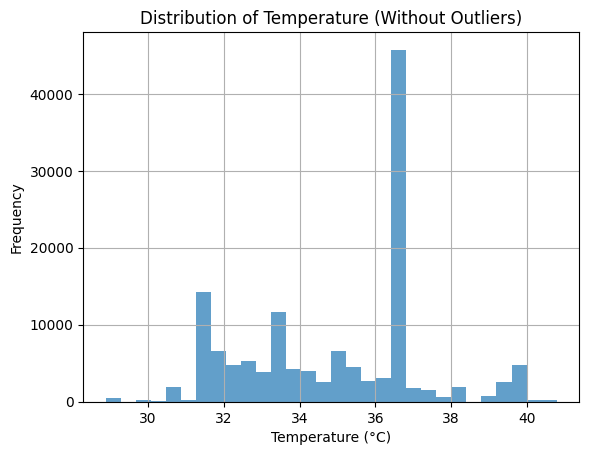

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Calculate the IQR for the 'best_temperature_2m' column
Q1 = ANG_measles_central_coordinates_weather['best_temperature_2m'].quantile(0.25)
Q3 = ANG_measles_central_coordinates_weather['best_temperature_2m'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove the outliers from the 'best_temperature_2m' column
df_no_outliers = ANG_measles_central_coordinates_weather[
    (ANG_measles_central_coordinates_weather['best_temperature_2m'] >= lower_bound) &
    (ANG_measles_central_coordinates_weather['best_temperature_2m'] <= upper_bound)
]

# Step 4: Plot the histogram without outliers
df_no_outliers['best_temperature_2m'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Temperature (Without Outliers)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



This histogram represents the distribution of temperature (°C) based on frequency.
Here's how to interpret it:

**X-axis (Temperature in °C)**: The temperature ranges from around 28°C to 41°C.
The distribution is centered around specific temperature ranges.

**Y-axis (Frequency)**: The vertical axis shows the frequency of data points or occurrences for each temperature range.

**Main Observation:**

The temperature around 36°C has an unusually high frequency, with over 40,000 occurrences.
This could indicate that the dataset contains a significant number of entries where the temperature is recorded at or around 36°C.
The rest of the temperature distribution seems more varied, with several smaller peaks around 30-35°C and 37-40°C,
 but none as dominant as the spike at 36°C.

**Possible Interpretations:**
The spike around 36°C could be due to the specific climatic condition in the region under study,
or it may reflect a common default or normalized value for missing or erroneous data.
The variation in other temperature ranges could indicate different weather patterns,
measurement locations, or times during data collection.
Further investigation into the data and the context of its collection might help determine
whether the 36°C spike is a natural occurrence or an artifact of the dataset.

**Interpretation of the graph**
The histogram depicts the distribution of measles cases for the first dose (for children under 1 year old). Here's the interpretation:

**Key Observations:**
Concentration Around Lower Values: The majority of measles case counts are concentrated at lower values. Most cases are between 0 and 1000, with the highest frequency around 0 to 500.
This suggests that in many instances, the number of cases is relatively low, particularly in the range of 0–500.

**Skewness:** The distribution is right-skewed, meaning that while most measles case counts are low, there are a few occurrences of higher case numbers (extending beyond 1000 and even up to 5000).

**Tails:** The long tail of the histogram (beyond 2000 cases) indicates that while rare, there are some districts or regions with significantly higher numbers of measles cases (above 3000–5000).

**Peak Frequency:** The highest bar, at the far left, suggests that a significant number of regions have between 0 and 500 cases. This indicates that for most regions or periods measured, the measles cases are relatively contained.

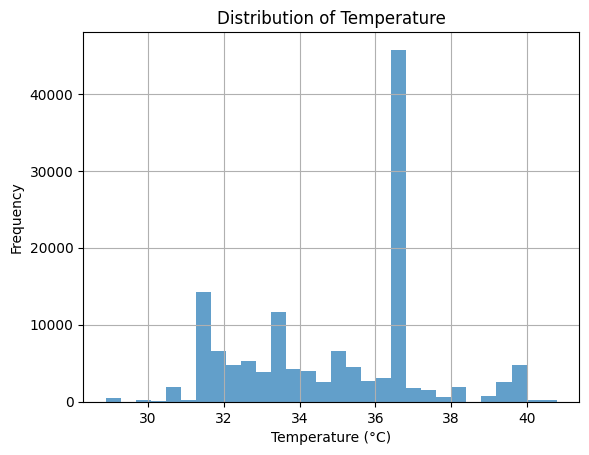

In [ ]:
# Step B: Histograms
ANG_measles_central_coordinates_weather['best_temperature_2m'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

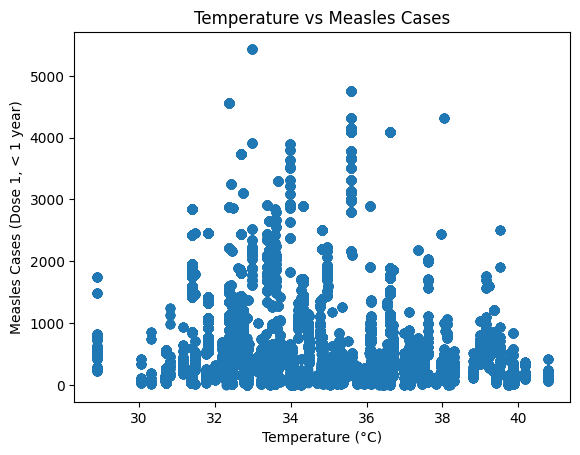

In [ ]:
# Step B: Scatter Plots
plt.scatter(ANG_measles_central_coordinates_weather['best_temperature_2m'], ANG_measles_central_coordinates_weather['measles1_l1'])
plt.title('Temperature vs Measles Cases')
plt.xlabel('Temperature (°C)')
plt.ylabel('Measles Cases (Dose 1, < 1 year)')
plt.show()


Interpretation

### The scatter plot illustrates the relationship between temperature (°C) on the x-axis and the number of measles cases (Dose 1, under 1 year old) on the y-axis.

**Key Observations:**

**Concentration of Data Points:**

There is a noticeable concentration of measles cases when the temperature is between 32°C and 36°C. This range seems to capture the majority of the data points, suggesting that most reported cases of measles occur when the temperature falls within this interval.
There are fewer cases when temperatures are lower (below 32°C) or higher (above 36°C), with a particularly sparse distribution of cases at extreme temperatures (e.g., above 40°C).
Spread of Measles Cases:

Measles cases are spread widely from 0 to 2000 cases, with some outliers going as high as 5000 cases, but these are rarer.
The concentration of cases seems to decline as the temperature increases beyond 36°C, and there's a lack of high case numbers when temperatures are above 40°C.
No Clear Linear Relationship:

The scatter plot doesn't indicate a clear linear correlation between temperature and measles cases. Instead, the relationship appears more complex, with a cluster of data points in certain temperature ranges.
Temperatures between 32°C and 34°C have the highest concentration of cases, but overall, the temperature does not appear to be the sole factor in determining the number of cases.
Outliers:

A few outlier points exist where a high number of measles cases (up to 5000) were reported at temperatures around 34°C to 36°C, but these are relatively rare.

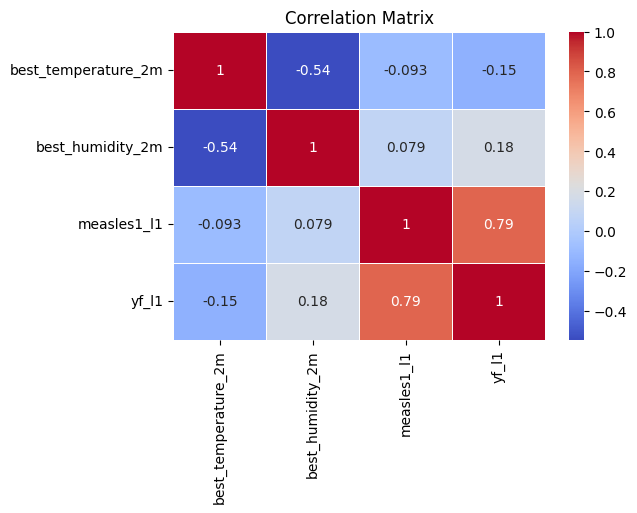

In [ ]:

# Correlation Heatmap
plt.figure(figsize=(6,4))
correlation_matrix = ANG_measles_central_coordinates_weather[['best_temperature_2m', 'best_humidity_2m', 'measles1_l1', 'yf_l1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Interpretation
The heatmap displayed represents the correlation matrix of four variables: **best_temperature_2m**, **best_humidity_2m**, **measles1_l1**, and **yf_l1**. The color scale on the right shows the degree of correlation, where:

**1.0 (dark red)** represents a perfect positive correlation,
**-1.0 (dark blue)** represents a perfect negative correlation,
Values close to 0 indicate no correlation.

Key Insights:
**best_temperature_2m:**

**Negative correlation (-0.54) with best_humidity_2m** :

This suggests that as temperature increases, humidity tends to decrease, and vice versa.
Weak negative correlation (-0.093) with measles1_l1: There is a very weak inverse relationship between temperature and the number of measles cases (dose 1, < 1 year). This implies temperature has little effect on the number of cases.
**Negative correlation (-0.15) with yf_l1**:

This indicates a weak inverse relationship between temperature and yellow fever cases (dose 1, < 1 year).
best_humidity_2m:

**Weak positive correlation (0.079) with measles1_l1**:

Humidity does not significantly influence measles cases, though there is a slight positive trend.
**Weak positive correlation (0.18) with yf_l1**:

Humidity has a slightly stronger positive relationship with yellow fever cases, though the relationship is still weak.
measles1_l1 (measles cases, dose 1, < 1 year):

**Strong positive correlation (0.79) with yf_l1**:

There is a strong positive relationship between measles cases and yellow fever cases. This suggests that regions or conditions that see an increase in measles cases might also see an increase in yellow fever cases, likely indicating some shared environmental or demographic factors.

In [ ]:
df=ANG_measles_central_coordinates_weather

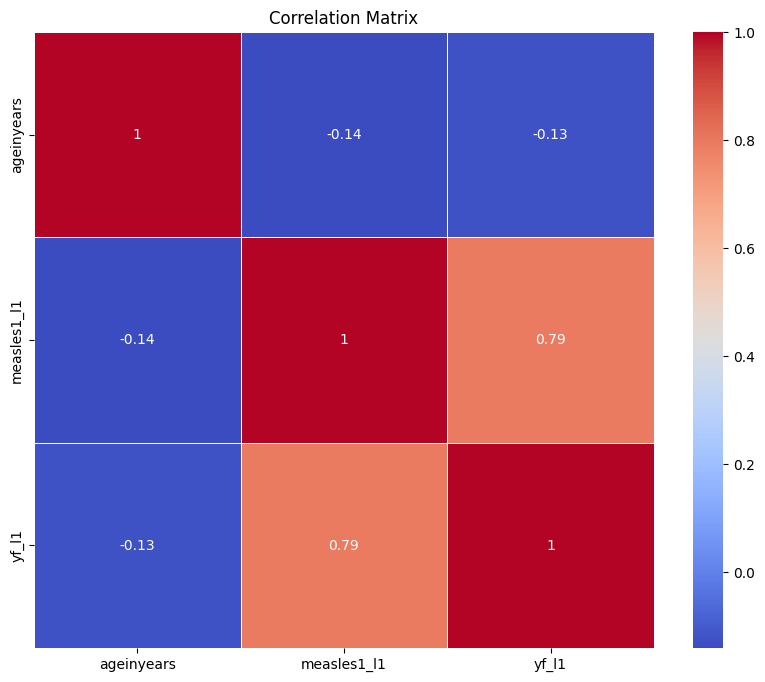

In [ ]:

# Step C: Correlation with Age, Place, Outcome
#age_corr = df[['ageinyears', 'measles1_l1', 'yf_l1']].corr()
#print(age_corr)



# Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = ANG_measles_central_coordinates_weather[['ageinyears', 'measles1_l1', 'yf_l1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#4. Geospatial Mapping:
#### a. Load the three datasets (disease outbreak, vaccination, and geolocation).
   ### b. Clean and preprocess the data (handle missing values, standardize formats).
   ### c. Merge the datasets based on the district-level information.  


In [ ]:
ANG_measles_central_coordinates['district_name'].unique()

array(['samba caju', 'balombo', 'benguela', 'bocoio', 'catumbela',
       'chongoroi', 'cubal', 'ganda', 'lobito', 'andulo', 'luau',
       'chinguar', 'cuito', 'ambriz', 'caala', 'cabinda',
       'cuito cuanavale', 'cuangar', 'cuchi', 'menongue', 'chitato',
       'ambaca', 'cambambe', 'banga', 'bolongongo', 'cazengo',
       'golungo alto', 'lucala', 'quiculungo', 'cassongue', 'ebo',
       'mussende', 'quibala', 'quilenda', 'cuanhama', 'cuvelai',
       'namacunde', 'bailundo', 'catchiungo', 'ecunha', 'huambo',
       'londuimbale', 'mungo', 'tchinjenje', 'caconda', 'caluquembe',
       'cacula', 'chicomba', 'chibia', 'chipindo', 'cuvango', 'humpata',
       'jamba', 'lubango', 'matala', 'quilengues', 'quipungo', 'cambulo',
       'caungula', 'lovua', 'lucapa', 'cacolo', 'dala', 'muconda',
       'saurimo', 'belas', 'cacuaco', 'cazenga', 'icolo e bengo',
       'kilamba kiaxi', 'luanda', 'talatona', 'viana', 'cacuso',
       'cahombo', 'calandula', 'cangandala', 'cambundi catembo',

In [ ]:
# Loop through the columns and display each with its index
for index, column in enumerate(ANG_measles_central_coordinates.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: inoutpatient
Index: 1, Column: outcome
Index: 2, Column: finalclassification
Index: 3, Column: provinceofresidence
Index: 4, Column: datesentformtodistrict
Index: 5, Column: datespecimencollected
Index: 6, Column: datespecimensenttolab
Index: 7, Column: datelabreceivedspecimen
Index: 8, Column: specimencondition
Index: 9, Column: dateofbirth
Index: 10, Column: ageinyears
Index: 11, Column: ageinmonths
Index: 12, Column: sex
Index: 13, Column: patientsresidence
Index: 14, Column: district_name
Index: 15, Column: towncity
Index: 16, Column: urbanrural
Index: 17, Column: dateseenhealthfacility
Index: 18, Column: numberofvaccinedoses
Index: 19, Column: datehealthfacilitynotified
Index: 20, Column: dateoflastvaccination
Index: 21, Column: measlesigm
Index: 22, Column: rubellaigm
Index: 23, Column: datelabsentresulttodistrict
Index: 24, Column: age
Index: 25, Column: datedistrictreclabresults
Index: 26, Column: reportinghealthfacility
Index: 27, Column: idnumber
Index: 28, 

In [ ]:
ANG_measles_central_coordinates= pd.read_csv('/content/ANG_measles_central_coordinates.csv')

<ipython-input-3-6f93a428c87f>:1: DtypeWarning: Columns (4,5,6,7,9,20,23,24,25,28,30,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ANG_measles_central_coordinates= pd.read_csv('/content/ANG_measles_central_coordinates.csv')


In [ ]:
import folium
import pandas as pd
from folium.plugins import ScrollZoomToggler

# Assuming ANG_measles_central_coordinates is a DataFrame
# Check and replace any NaN or invalid values in 'district_name', 'Latitude', and 'Longitude'
ANG_measles_central_coordinates = ANG_measles_central_coordinates.dropna(subset=['district_name', 'Latitude', 'Longitude'])

# Initialize the Angola map
angola_map = folium.Map(location=[-11.2027, 17.8739], zoom_start=5, scrollWheelZoom=True)  # Added scrollWheelZoom=True to enable scroll zooming

# Group by 'district_name' and sum the vaccines for each district
vaccine_columns = ['hpv1', 'hpv2', 'hpv3', 'men_a', 'mmr', 'bcg_l1', 'bcg_ge1', 'd1_l1', 'd1_ge1',
                   'd2_l1', 'd2_ge1', 'd3_l1', 'd3_ge1', 'measles1_l1', 'measles1_ge1',
                   'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv1_ge1', 'opv2_l1', 'opv2_ge1',
                   'opv3_l1', 'opv3_ge1', 'opvbirth_l1', 'opvbirth_ge1', 'pneumo1_l1',
                   'pneumo1_ge1', 'pneumo2_l1', 'pneumo2_ge1', 'pneumo3_l1', 'pneumo3_ge1',
                   'rota1_l1', 'rota1_ge1', 'rota2_l1', 'rota2_ge1', 'rota3_l1', 'rota3_ge1',
                   'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1', 'ipv1_ge1',
                   'ipv2_l1', 'ipv2_ge1', 'yf_l1', 'yf_ge1', 'hepb0', 'mena',
                   'rtss1_l1', 'rtss2_l1', 'rtss3_l1', 'rtss4_l1',
                   'tt1_cba', 'tt2_cba', 'tt3_cba', 'tt4_cba', 'tt5_cba']  # Add all vaccine-related columns
vaccine_sum = ANG_measles_central_coordinates.groupby('district_name')[vaccine_columns].sum()

# Merge the summed vaccines back with the coordinates data
coordinates_vaccine_sum = pd.merge(ANG_measles_central_coordinates[['district_name', 'Latitude', 'Longitude']].drop_duplicates(),
                                   vaccine_sum, on='district_name')

# Create markers for each district
for index, row in coordinates_vaccine_sum.iterrows():
    vaccine_info = ""
    for vaccine, total in row[vaccine_columns].items():
        vaccine_info += f"<li>{vaccine}: {total}</li>"

    # Modify popup_content to include the name of the country
    popup_content = f"""
    <div>
        <h4>Country: Angola</h4>
        <h4>District: {row['district_name']}</h4>
        <ul>{vaccine_info}</ul>
    </div>
    """

    # Add a folium marker with scrollable popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_content, max_width=300, max_height=200, scrollable=True),  # Added scrollable and max_height
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(angola_map)

# Optional: Add scroll zoom toggle (to toggle scroll-based zooming)
ScrollZoomToggler().add_to(angola_map)

# Save the map to an HTML file
angola_map.save('angola_vaccine_map.html')

# If you're in a Jupyter notebook, you can display the map directly
angola_map


# 5. Correlation Analysis:
  ### a. Prepare the temperature and disease outbreak data.
  ### b. Perform statistical tests to assess the correlation.
  ### c. Visualize the relationship between temperature and disease outbreaks.



In [ ]:
# Loop through the columns and display each with its index
for index, column in enumerate(ANG_measles_central_coordinates_weather.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: inoutpatient
Index: 1, Column: outcome
Index: 2, Column: finalclassification
Index: 3, Column: provinceofresidence
Index: 4, Column: datesentformtodistrict
Index: 5, Column: datespecimencollected
Index: 6, Column: datespecimensenttolab
Index: 7, Column: datelabreceivedspecimen
Index: 8, Column: specimencondition
Index: 9, Column: dateofbirth
Index: 10, Column: ageinyears
Index: 11, Column: ageinmonths
Index: 12, Column: sex
Index: 13, Column: patientsresidence
Index: 14, Column: district_name
Index: 15, Column: towncity
Index: 16, Column: urbanrural
Index: 17, Column: dateseenhealthfacility
Index: 18, Column: numberofvaccinedoses
Index: 19, Column: datehealthfacilitynotified
Index: 20, Column: dateoflastvaccination
Index: 21, Column: measlesigm
Index: 22, Column: rubellaigm
Index: 23, Column: datelabsentresulttodistrict
Index: 24, Column: age
Index: 25, Column: datedistrictreclabresults
Index: 26, Column: reportinghealthfacility
Index: 27, Column: idnumber
Index: 28, 

# Imputation of missing values in my dataframe

In [ ]:
ANG_measles_central_coordinates_weather.isnull().sum()


,0
inoutpatient,686
outcome,52945
finalclassification,32
provinceofresidence,8951
datesentformtodistrict,74313
...,...
tt5_cba,0
Latitude,0
Longitude,0
best_temperature_2m,0


In [ ]:
import pandas as pd

# Assuming your DataFrame is named ANG_measles_central_coordinates_weather
df = ANG_measles_central_coordinates_weather

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Display the missing percentage for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

# Identify columns where the percentage of missing values is greater than 80%
columns_to_drop = missing_percentage[missing_percentage >= 80].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame columns
print(f"Columns dropped: {list(columns_to_drop)}")
print(f"Remaining columns: {df_cleaned.columns}")


Percentage of missing values in each column:
inoutpatient               0.500306
outcome                   38.613291
finalclassification        0.023338
provinceofresidence        6.528049
datesentformtodistrict    54.197176
                            ...    
tt5_cba                    0.000000
Latitude                   0.000000
Longitude                  0.000000
best_temperature_2m        0.000000
best_humidity_2m           0.000000
Length: 112, dtype: float64
Columns dropped: ['dateoflastvaccination', 'uniquekey1', 'diseasecondition', 'specimensource', 'ward', 'fever', 'generalizedrash', 'cough', 'runningnose', 'redeyes', 'swollenlymphnodes', 'jointpain']
Remaining columns: Index(['inoutpatient', 'outcome', 'finalclassification', 'provinceofresidence',
       'datesentformtodistrict', 'datespecimencollected',
       'datespecimensenttolab', 'datelabreceivedspecimen', 'specimencondition',
       'dateofbirth', 'ageinyears', 'ageinmonths', 'sex', 'patientsresidence',
       'distric

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df_cleaned
df = df_cleaned

# Calculate the percentage of zeros in each column
zero_percentage = (df == 0).mean() * 100

# Display the zero percentage for each column
print("Percentage of zero values in each column:")
print(zero_percentage)

# Identify columns where the percentage of zero values is greater than or equal to 80%
columns_to_drop = zero_percentage[zero_percentage >= 80].index

# Drop the columns from the DataFrame
df_cleaned_no_zeros = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame columns
print(f"Columns dropped due to high percentage of zeros: {list(columns_to_drop)}")
print(f"Remaining columns: {df_cleaned_no_zeros.columns}")


Percentage of zero values in each column:
inoutpatient                0.0
outcome                     0.0
finalclassification         0.0
provinceofresidence         0.0
datesentformtodistrict      0.0
                          ...  
tt5_cba                   100.0
Latitude                    0.0
Longitude                   0.0
best_temperature_2m         0.0
best_humidity_2m            0.0
Length: 100, dtype: float64
Columns dropped due to high percentage of zeros: ['hpv1', 'hpv2', 'hpv3', 'men_a', 'mmr', 'bcg_ge1', 'd1_ge1', 'opv1_ge1', 'opvbirth_ge1', 'pneumo1_ge1', 'pneumo2_ge1', 'rota1_ge1', 'rota2_ge1', 'rota3_l1', 'rota3_ge1', 'ipv1_ge1', 'ipv2_l1', 'ipv2_ge1', 'yf_ge1', 'rtss1_l1', 'rtss2_l1', 'rtss3_l1', 'rtss4_l1', 'tt3_cba', 'tt4_cba', 'tt5_cba']
Remaining columns: Index(['inoutpatient', 'outcome', 'finalclassification', 'provinceofresidence',
       'datesentformtodistrict', 'datespecimencollected',
       'datespecimensenttolab', 'datelabreceivedspecimen', 'specimenconditi

In [ ]:
df_cleaned_no_zeros.isnull()

,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,ipv1_l1,yf_l1,hepb0,mena,tt1_cba,tt2_cba,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,False,True,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
137114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## 1: Prepare the Data

In [ ]:
import pandas as pd

# Assuming your DataFrame is df_cleaned_no_zeros
df = df_cleaned_no_zeros

# Select the temperature and outbreak-related columns
temperature_column = 'best_temperature_2m'
outbreak_columns = [
    'measlesigm', 'rubellaigm', 'measles1_l1', 'measles1_ge1', 'measles2_l1',
    'measles2_ge1', 'opv1_l1', 'opv2_l1', 'opv2_ge1', 'opv3_l1', 'opv3_ge1',
    'opvbirth_l1', 'pneumo1_l1', 'pneumo2_l1', 'pneumo3_l1', 'pneumo3_ge1',
    'rota1_l1', 'rota2_l1', 'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw',
    'ipv1_l1', 'yf_l1', 'hepb0', 'mena'
]

# Filter the DataFrame for these columns
df_outbreak = df[[temperature_column] + outbreak_columns]

# Display the prepared data
df_outbreak.head()


,best_temperature_2m,measlesigm,rubellaigm,measles1_l1,measles1_ge1,measles2_l1,measles2_ge1,opv1_l1,opv2_l1,opv2_ge1,...,rota2_l1,tt1_pw,tt2_pw,tt3_pw,tt4_pw,tt5_pw,ipv1_l1,yf_l1,hepb0,mena
0,31.3825,NaN,NaN,45.0,0,0,13.0,67,64.0,0.0,...,64,41,13,17,10,1,64.0,45,45,0.0
1,31.3825,NaN,NaN,49.0,0,0,0.0,50,50.0,0.0,...,50,35,21,8,5,6,50.0,49,65,0.0
2,31.3825,NaN,NaN,243.0,14,87,10.0,173,251.0,29.0,...,251,73,28,16,8,0,251.0,243,128,0.0
3,31.3825,NaN,NaN,79.0,0,0,16.0,48,72.0,0.0,...,72,84,78,1,1,0,72.0,79,35,0.0
4,31.3825,NaN,NaN,31.0,0,0,0.0,57,51.0,0.0,...,51,38,10,6,3,10,44.0,31,73,0.0


## Step 2: Perform Statistical Correlation Tests

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_outbreak.corr()

# Display the correlation of temperature with outbreak columns
temperature_correlation = correlation_matrix[temperature_column]
print("Correlation of temperature with outbreak-related columns:")
print(temperature_correlation)


Correlation of temperature with outbreak-related columns:
best_temperature_2m    1.000000
measlesigm             0.025130
rubellaigm             0.068088
measles1_l1           -0.092982
measles1_ge1           0.087721
measles2_l1            0.117493
measles2_ge1          -0.122471
opv1_l1               -0.020042
opv2_l1               -0.041256
opv2_ge1              -0.001467
opv3_l1               -0.068406
opv3_ge1               0.009039
opvbirth_l1           -0.030233
pneumo1_l1            -0.084019
pneumo2_l1            -0.103897
pneumo3_l1            -0.108641
pneumo3_ge1           -0.034125
rota1_l1               0.003185
rota2_l1               0.019380
tt1_pw                -0.069254
tt2_pw                 0.017188
tt3_pw                -0.378749
tt4_pw                -0.377047
tt5_pw                -0.309916
ipv1_l1               -0.155600
yf_l1                 -0.151515
hepb0                 -0.063277
mena                        NaN
Name: best_temperature_2m, dtype: float64


## Step 3: Visualize the Relationship

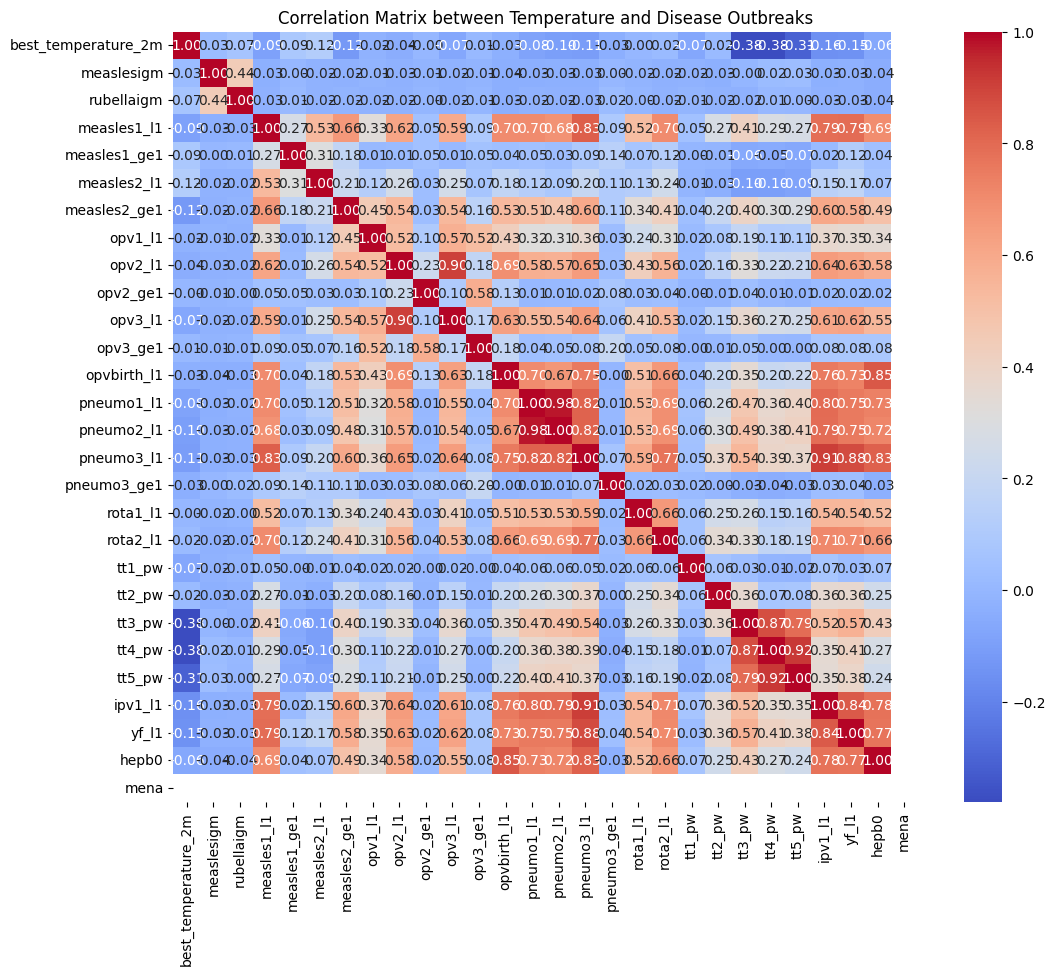

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Temperature and Vaccination')
plt.show()


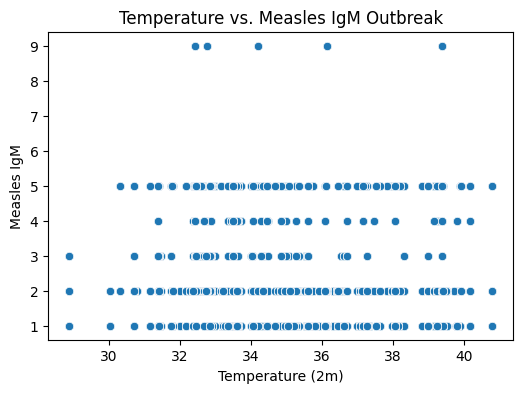

In [ ]:
# Scatter plot for a specific disease, e.g., Measles IgM
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df[temperature_column], y=df['measlesigm'])
plt.title('Temperature vs. Measles IgM Outbreak')
plt.xlabel('Temperature (2m)')
plt.ylabel('Measles IgM')
plt.show()

This scatter plot depicts the relationship between Temperature (2 meters) and Measles IgM levels.

**Key observations:**

**Temperature Range:**

The temperatures vary between approximately 30°C and 40°C.

**Measles IgM:**

Measles IgM values range from 1 to 9. These levels likely represent either outbreak intensity or a specific measurement related to Measles IgM testing.

**Distribution of Measles IgM:**

**Concentrated IgM values:** There is a heavy concentration of Measles IgM levels at 1, 2, and 3, indicating that most cases fall within these levels, regardless of the temperature.
High IgM levels: Only a few cases reach the higher values (IgM = 7, 8, and 9), mostly clustered around the 34°C to 36°C temperature range.

**Temperature and Measles IgM Relationship:**

There is no clear linear or obvious relationship between temperature and the Measles IgM values. The IgM levels seem fairly spread across the entire temperature range, indicating that temperature does not have a direct, strong influence on Measles IgM levels based on the scatter.

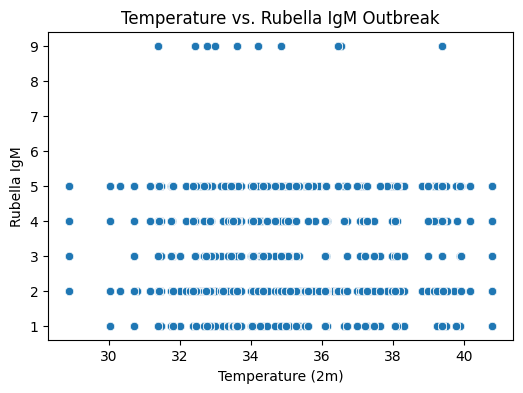

In [ ]:



# Scatter plot for another example, e.g., Rubella IgM
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df[temperature_column], y=df['rubellaigm'])
plt.title('Temperature vs. Rubella IgM Outbreak')
plt.xlabel('Temperature (2m)')
plt.ylabel('Rubella IgM')
plt.show()


# 6. Predictive Modeling (Optional):
   ### a. Feature engineering and selection.
   ### b. Split the data into training and testing sets.
   ### c. Develop and train a predictive model.
   #### d. Evaluate the model's performance.



In [ ]:
df_outbreak.shape


(137116, 28)

In [ ]:
df_outbreak.columns

Index(['best_temperature_2m', 'measlesigm', 'rubellaigm', 'measles1_l1',
       'measles1_ge1', 'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv2_l1',
       'opv2_ge1', 'opv3_l1', 'opv3_ge1', 'opvbirth_l1', 'pneumo1_l1',
       'pneumo2_l1', 'pneumo3_l1', 'pneumo3_ge1', 'rota1_l1', 'rota2_l1',
       'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1', 'yf_l1',
       'hepb0', 'mena'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming df_cleaned and df_outbreak are already defined DataFrames

# Step 1: Drop the 'age' column from df_cleaned
age_column = df_cleaned.pop('age')

# Step 2: Append the 'age' column to df_outbreak
# Ensure that df_outbreak has the same number of rows as df_cleaned before appending
if len(df_outbreak) == len(age_column):
    df_outbreak['age'] = age_column
else:
    print("Length mismatch: df_outbreak and age_column must have the same number of rows.")

# Now df_outbreak contains the 'age' column


<ipython-input-36-b1bd61316d73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outbreak['age'] = age_column


In [ ]:
df_outbreak.shape

(137116, 29)

In [ ]:
df_outbreak.columns

Index(['best_temperature_2m', 'measlesigm', 'rubellaigm', 'measles1_l1',
       'measles1_ge1', 'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv2_l1',
       'opv2_ge1', 'opv3_l1', 'opv3_ge1', 'opvbirth_l1', 'pneumo1_l1',
       'pneumo2_l1', 'pneumo3_l1', 'pneumo3_ge1', 'rota1_l1', 'rota2_l1',
       'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1', 'yf_l1',
       'hepb0', 'mena', 'age'],
      dtype='object')

In [ ]:
df_outbreak.isnull().sum()

,0
best_temperature_2m,0
measlesigm,84781
rubellaigm,85048
measles1_l1,0
measles1_ge1,0
measles2_l1,0
measles2_ge1,0
opv1_l1,0
opv2_l1,0
opv2_ge1,0


In [ ]:
# Convert the 'age' column from object to numeric (float) first
df_outbreak['age'] = pd.to_numeric(df_outbreak['age'], errors='coerce')



<ipython-input-49-451b6028c88c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outbreak['age'] = pd.to_numeric(df_outbreak['age'], errors='coerce')


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Sample DataFrame (replace with your actual DataFrame)
# df_outbreak = pd.read_csv('your_data.csv')

# Step 1: Prepare the data
# Selecting columns for imputation, excluding the target variable and any non-numeric columns
features_to_impute = df_outbreak.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df_outbreak[features_to_impute]

# Step 2: Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Step 3: Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Step 4: Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=features_to_impute)

# Step 5: Replace the original columns with the imputed ones
df_outbreak[features_to_impute] = df_imputed

# Step 6: Check the result
print(df_outbreak.isna().sum())  # This should show zero missing values in the imputed columns


best_temperature_2m    0
measlesigm             0
rubellaigm             0
measles1_l1            0
measles1_ge1           0
measles2_l1            0
measles2_ge1           0
opv1_l1                0
opv2_l1                0
opv2_ge1               0
opv3_l1                0
opv3_ge1               0
opvbirth_l1            0
pneumo1_l1             0
pneumo2_l1             0
pneumo3_l1             0
pneumo3_ge1            0
rota1_l1               0
rota2_l1               0
tt1_pw                 0
tt2_pw                 0
tt3_pw                 0
tt4_pw                 0
tt5_pw                 0
ipv1_l1                0
yf_l1                  0
hepb0                  0
mena                   0
age                    0
dtype: int64


<ipython-input-55-de5eb112551b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outbreak[features_to_impute] = df_imputed


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_outbreak is your DataFrame
# Create an instance of StandardScaler
scaler = StandardScaler()

# Select the columns to standardize (exclude non-numeric columns)
numeric_cols = df_outbreak.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler and transform the data
df_outbreak[numeric_cols] = scaler.fit_transform(df_outbreak[numeric_cols])

# Display the standardized DataFrame
df_outbreak


<ipython-input-59-ddc3d784bea7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outbreak[numeric_cols] = scaler.fit_transform(df_outbreak[numeric_cols])


,best_temperature_2m,measlesigm,rubellaigm,measles1_l1,measles1_ge1,measles2_l1,measles2_ge1,opv1_l1,opv2_l1,opv2_ge1,...,tt1_pw,tt2_pw,tt3_pw,tt4_pw,tt5_pw,ipv1_l1,yf_l1,hepb0,mena,age
0,-1.491202,0.338453,-0.743314,-1.077085,-0.408703,-0.253032,-0.874253,-0.453491,-0.849862,-0.091832,...,-0.185507,-0.465070,-0.637989,-0.396336,-0.476823,-1.084665,-1.048888,-0.996997,0.0,1.15653
1,-1.491202,-0.338361,-0.743314,-1.072439,-0.408703,-0.253032,-0.896907,-0.461031,-0.864388,-0.091832,...,-0.186614,-0.458297,-0.707442,-0.455411,-0.411540,-1.104763,-1.043083,-0.975189,0.0,1.15653
2,-1.491202,0.112848,-0.373621,-0.847073,-0.367322,-0.069338,-0.879481,-0.406479,-0.655831,-0.018733,...,-0.179600,-0.452370,-0.645706,-0.419966,-0.489880,-0.816222,-0.761539,-0.906493,0.0,1.15653
3,-1.491202,0.338453,-0.373621,-1.037588,-0.408703,-0.253032,-0.869025,-0.461918,-0.841561,-0.091832,...,-0.177570,-0.410036,-0.761461,-0.502670,-0.489880,-1.073181,-0.999545,-1.007901,0.0,1.15653
4,-1.491202,-0.112756,-0.743314,-1.093349,-0.408703,-0.253032,-0.896907,-0.457926,-0.863351,-0.091832,...,-0.186061,-0.467610,-0.722876,-0.479040,-0.359313,-1.113376,-1.069206,-0.966466,0.0,1.15653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137111,-1.072194,-0.112756,-1.113007,0.673565,0.008066,-0.253032,0.770766,0.417564,0.867364,-0.003609,...,0.077529,0.054792,0.342073,-0.219112,-0.463766,0.810227,1.219425,0.391088,0.0,-0.58026
137112,-1.072194,-0.112756,-1.113007,0.178689,-0.320029,-0.253032,0.383908,0.275640,0.548821,-0.036378,...,0.022522,-0.070517,-0.560819,-0.195483,-0.280973,0.564752,0.377697,0.322392,0.0,-0.58026
137113,-1.072194,-0.112756,-1.113007,0.430774,-0.311161,-0.253032,0.532029,0.342167,0.726251,-0.091832,...,-0.011996,0.074266,0.859113,0.537042,0.058500,0.910713,0.643277,0.360557,0.0,-0.58026
137114,-1.072194,-0.112756,-1.113007,0.427289,-0.343675,-0.253032,0.692349,0.235281,0.690972,-0.086791,...,-0.062572,-0.003629,0.704773,0.076260,0.228237,0.418328,1.023506,0.194815,0.0,-0.58026


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data
X = df_outbreak.drop('measlesigm', axis=1)  # Features
y = df_outbreak['measlesigm']                 # Target variable


threshold = 0
y = (y > threshold).astype(int)

# Step 4: Define categorical and numerical features
#categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Step 5: Create a preprocessor with scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ]
)

# Step 6: Create a pipeline that first preprocesses the data and then applies a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
pipeline.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = pipeline.predict(X_test)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     16570
           1       0.94      0.93      0.93     10854

    accuracy                           0.95     27424
   macro avg       0.95      0.94      0.95     27424
weighted avg       0.95      0.95      0.95     27424



In [ ]:
BUU_measles_central= pd.read_csv('/content/BUU_measles_central.csv')

<ipython-input-32-9b1c27f58922>:1: DtypeWarning: Columns (0,1,4,5,6,7,9,20,23,24,25,28,29,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  BUU_measles_central= pd.read_csv('/content/BUU_measles_central.csv')


In [ ]:
BUU_measles_central.shape

(149569, 108)

In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = BUU_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
BUU_measles_central_coordinates =BUU_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
BUU_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 49/49 [00:38<00:00,  1.29it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2,1,2.0,ngozi,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-1,-1,-1,-1,-1,-2.835504,30.031594
1,2,1,2.0,ngozi,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-1,-1,-1,-1,-1,-2.835504,30.031594
2,2,1,2.0,ngozi,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-1,-1,-1,-1,-1,-2.835504,30.031594
3,2,1,2.0,ngozi,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-1,-1,-1,-1,-1,-2.835504,30.031594
4,2,1,2.0,ngozi,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-1,-1,-1,-1,-1,-2.835504,30.031594


In [ ]:
BUU_measles_central_coordinates= pd.read_csv('/content/BUU_measles_central_coordinates.csv')

<ipython-input-15-e7fff047d7ec>:1: DtypeWarning: Columns (0,1,4,5,6,7,9,20,23,24,25,28,29,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  BUU_measles_central_coordinates= pd.read_csv('/content/BUU_measles_central_coordinates.csv')


In [ ]:
BUU_measles_central_coordinates['district_name'].unique()

array(['kiremba', 'ngozi', 'muyinga', 'vumbi', 'busoni', 'bugarama',
       'cibitoke', 'nyanza-lac', 'musema', 'giteranyi', 'buye',
       'bukinanyana', 'gisuru', 'kibuye', 'fota', 'gitega', 'kibumbu',
       'cankuzo', 'gihofi', 'kayanza', 'murore', 'kabezi', 'nyabikere',
       'muramvya', 'rwibaga', 'mukenke', 'rutovu', 'ryansoro', 'mpanda',
       'ruyigi', 'bubanza', 'rutana', 'mutaho', 'makamba', 'rumonge',
       'butezi', 'kinyinya', 'kirundo', 'mabayi', 'kiganda', 'isale',
       'gahombo', 'gashoho', 'buhiga', 'matana', 'bururi', 'nyanza lac',
       'bujumbura nord', 'isare'], dtype=object)

In [ ]:
# Loop through the columns and display each with its index
for index, column in enumerate(BUU_measles_central_coordinates.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: inoutpatient
Index: 1, Column: outcome
Index: 2, Column: finalclassification
Index: 3, Column: provinceofresidence
Index: 4, Column: datesentformtodistrict
Index: 5, Column: datespecimencollected
Index: 6, Column: datespecimensenttolab
Index: 7, Column: datelabreceivedspecimen
Index: 8, Column: specimencondition
Index: 9, Column: dateofbirth
Index: 10, Column: ageinyears
Index: 11, Column: ageinmonths
Index: 12, Column: sex
Index: 13, Column: patientsresidence
Index: 14, Column: district_name
Index: 15, Column: towncity
Index: 16, Column: urbanrural
Index: 17, Column: dateseenhealthfacility
Index: 18, Column: numberofvaccinedoses
Index: 19, Column: datehealthfacilitynotified
Index: 20, Column: dateoflastvaccination
Index: 21, Column: measlesigm
Index: 22, Column: rubellaigm
Index: 23, Column: datelabsentresulttodistrict
Index: 24, Column: age
Index: 25, Column: datedistrictreclabresults
Index: 26, Column: reportinghealthfacility
Index: 27, Column: idnumber
Index: 28, 

In [ ]:
import folium
import pandas as pd
from folium.plugins import ScrollZoomToggler

# List of valid district names
valid_district_names = ['kiremba', 'ngozi', 'muyinga', 'vumbi', 'busoni', 'bugarama',
       'cibitoke', 'nyanza-lac', 'musema', 'giteranyi', 'buye',
       'bukinanyana', 'gisuru', 'kibuye', 'fota', 'gitega', 'kibumbu',
       'cankuzo', 'gihofi', 'kayanza', 'murore', 'kabezi', 'nyabikere',
       'muramvya', 'rwibaga', 'mukenke', 'rutovu', 'ryansoro', 'mpanda',
       'ruyigi', 'bubanza', 'rutana', 'mutaho', 'makamba', 'rumonge',
       'butezi', 'kinyinya', 'kirundo', 'mabayi', 'kiganda', 'isale',
       'gahombo', 'gashoho', 'buhiga', 'matana', 'bururi', 'nyanza lac',
       'bujumbura nord', 'isare']

# Assuming BUU_measles_central_coordinates is a DataFrame
# Filter rows to keep only the districts that are in the valid_district_names list
BUU_measles_central_coordinates = BUU_measles_central_coordinates[
    BUU_measles_central_coordinates['district_name'].isin(valid_district_names)
]

# Check and replace any NaN or invalid values in 'district_name', 'Latitude', and 'Longitude'
BUU_measles_central_coordinates = BUU_measles_central_coordinates.dropna(subset=['district_name', 'Latitude', 'Longitude'])

# Initialize the Burundi map
burundi_map = folium.Map(location=[-3.3731, 29.9189], zoom_start=8, scrollWheelZoom=True)

# Group by 'district_name' and sum the vaccines for each district
vaccine_columns = ['hpv1', 'hpv2', 'hpv3', 'men_a', 'mmr', 'bcg_l1', 'bcg_ge1', 'd1_l1', 'd1_ge1',
                   'd2_l1', 'd2_ge1', 'd3_l1', 'd3_ge1', 'measles1_l1', 'measles1_ge1',
                   'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv1_ge1', 'opv2_l1', 'opv2_ge1',
                   'opv3_l1', 'opv3_ge1', 'opvbirth_l1', 'opvbirth_ge1', 'pneumo1_l1',
                   'pneumo1_ge1', 'pneumo2_l1', 'pneumo2_ge1', 'pneumo3_l1', 'pneumo3_ge1',
                   'rota1_l1', 'rota1_ge1', 'rota2_l1', 'rota2_ge1', 'rota3_l1', 'rota3_ge1',
                   'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1', 'ipv1_ge1',
                   'ipv2_l1', 'ipv2_ge1', 'yf_l1', 'yf_ge1', 'hepb0', 'mena',
                   'rtss1_l1', 'rtss2_l1', 'rtss3_l1', 'rtss4_l1',
                   'tt1_cba', 'tt2_cba', 'tt3_cba', 'tt4_cba', 'tt5_cba']  # Add all vaccine-related columns

vaccine_sum = BUU_measles_central_coordinates.groupby('district_name')[vaccine_columns].sum()

# Merge the summed vaccines back with the coordinates data
coordinates_vaccine_sum = pd.merge(BUU_measles_central_coordinates[['district_name', 'Latitude', 'Longitude']].drop_duplicates(),
                                   vaccine_sum, on='district_name')

# Create markers for each district
for index, row in coordinates_vaccine_sum.iterrows():
    vaccine_info = ""
    for vaccine, total in row[vaccine_columns].items():
        vaccine_info += f"<li>{vaccine}: {total}</li>"

    # Modify popup_content to include the name of the country and district
    popup_content = f"""
    <div>
        <h4>Country: Burundi</h4>
        <h4>District: {row['district_name']}</h4>
        <ul>{vaccine_info}</ul>
    </div>
    """

    # Add a folium marker with scrollable popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_content, max_width=300, max_height=200, scrollable=True),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(burundi_map)

# Optional: Add scroll zoom toggle (to toggle scroll-based zooming)
ScrollZoomToggler().add_to(burundi_map)

# Save the map to an HTML file
burundi_map.save('burundi_vaccine_map_filtered.html')

# If you're in a Jupyter notebook, you can display the map directly
burundi_map


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = BUU_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
BUU_measles_central_coordinates =BUU_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
BUU_measles_central_coordinates.head()


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
BUU_measles_central_coordinates.to_csv('BUU_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('BUU_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CNG_measles_central= pd.read_csv('/content/CNG_measles_central (2).csv')

<ipython-input-38-2f5c8aaeb292>:1: DtypeWarning: Columns (4,24,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  CNG_measles_central= pd.read_csv('/content/CNG_measles_central (2).csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = CNG_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
CNG_measles_central_coordinates =CNG_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
CNG_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 51/51 [00:40<00:00,  1.27it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,NaN,1.0,4.0,brazzaville,NaN,2023-04-06 00:00:00,2023-04-12 00:00:00,2023-04-12 00:00:00,1.0,2020-04-24 00:00:00,...,0,0,0,0,0,0,0,0,-4.126455,15.314035
1,NaN,1.0,4.0,brazzaville,NaN,2023-04-06 00:00:00,2023-04-12 00:00:00,2023-04-12 00:00:00,1.0,2020-04-24 00:00:00,...,0,0,0,0,0,0,0,0,-4.126455,15.314035
2,NaN,1.0,4.0,brazzaville,NaN,2023-04-06 00:00:00,2023-04-12 00:00:00,2023-04-12 00:00:00,1.0,2020-04-24 00:00:00,...,0,0,0,0,0,0,0,0,-4.126455,15.314035
3,NaN,1.0,4.0,brazzaville,NaN,2023-04-06 00:00:00,2023-04-12 00:00:00,2023-04-12 00:00:00,1.0,2020-04-24 00:00:00,...,0,0,0,0,0,0,0,0,-4.126455,15.314035
4,NaN,1.0,4.0,brazzaville,NaN,2023-04-06 00:00:00,2023-04-12 00:00:00,2023-04-12 00:00:00,1.0,2020-04-24 00:00:00,...,0,0,0,0,0,0,0,0,-4.126455,15.314035


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
CNG_measles_central_coordinates.to_csv('CNG_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('CNG_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CNG_measles_central_coordinates= pd.read_csv('/content/CNG_measles_central_coordinates.csv')

<ipython-input-21-89c299fe4be8>:1: DtypeWarning: Columns (4,24,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  CNG_measles_central_coordinates= pd.read_csv('/content/CNG_measles_central_coordinates.csv')


In [ ]:
CNG_measles_central_coordinates['district_name'].unique()

array(['djiri', 'poto-poto', 'boko', 'djambala-lekana', 'sibiti',
       'mongo poukou', 'mfilou', 'enyelle-betou', 'abala', 'impfondo',
       'goma tsetse', 'loandjili', 'mossendjo', 'madibou', 'etoumbi',
       'mouyondzi', 'kinkala', 'ewo', 'alima', 'dolisie', 'lumumba',
       'madingou', 'sembe souanke', 'ouesso mokeko pikounda',
       'mossaka loukolela', 'ouenze', 'madingo kayes-zambi', 'mvoumvou',
       'kindamba', 'gamboma', 'kimongo londela kayes', 'makelekele',
       'talangai', 'ile mbamou', 'moungali', 'owando', 'kintele',
       'mvouti-kakamoeka', 'ngoyo', 'mindouli', 'mayoko', 'hinda-loango',
       'tie-tie', 'tchiamba nzassi', 'kibangou', 'nkayi', 'bacongo',
       'loutete', 'zanaga', 'loudima', 'ouesso'], dtype=object)

In [ ]:
# Loop through the columns and display each with its index
for index, column in enumerate(CNG_measles_central_coordinates.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: inoutpatient
Index: 1, Column: outcome
Index: 2, Column: finalclassification
Index: 3, Column: provinceofresidence
Index: 4, Column: datesentformtodistrict
Index: 5, Column: datespecimencollected
Index: 6, Column: datespecimensenttolab
Index: 7, Column: datelabreceivedspecimen
Index: 8, Column: specimencondition
Index: 9, Column: dateofbirth
Index: 10, Column: ageinyears
Index: 11, Column: ageinmonths
Index: 12, Column: sex
Index: 13, Column: patientsresidence
Index: 14, Column: district_name
Index: 15, Column: towncity
Index: 16, Column: urbanrural
Index: 17, Column: dateseenhealthfacility
Index: 18, Column: numberofvaccinedoses
Index: 19, Column: datehealthfacilitynotified
Index: 20, Column: dateoflastvaccination
Index: 21, Column: measlesigm
Index: 22, Column: rubellaigm
Index: 23, Column: datelabsentresulttodistrict
Index: 24, Column: age
Index: 25, Column: datedistrictreclabresults
Index: 26, Column: reportinghealthfacility
Index: 27, Column: idnumber
Index: 28, 

In [ ]:
import folium
import pandas as pd
from folium.plugins import ScrollZoomToggler

# List of valid district names for CNG
valid_district_names_cng = [
    'djiri', 'poto-poto', 'boko', 'djambala-lekana', 'sibiti',
    'mongo poukou', 'mfilou', 'enyelle-betou', 'abala', 'impfondo',
    'goma tsetse', 'loandjili', 'mossendjo', 'madibou', 'etoumbi',
    'mouyondzi', 'kinkala', 'ewo', 'alima', 'dolisie', 'lumumba',
    'madingou', 'sembe souanke', 'ouesso mokeko pikounda',
    'mossaka loukolela', 'ouenze', 'madingo kayes-zambi', 'mvoumvou',
    'kindamba', 'gamboma', 'kimongo londela kayes', 'makelekele',
    'talangai', 'ile mbamou', 'moungali', 'owando', 'kintele',
    'mvouti-kakamoeka', 'ngoyo', 'mindouli', 'mayoko', 'hinda-loango',
    'tie-tie', 'tchiamba nzassi', 'kibangou', 'nkayi', 'bacongo',
    'loutete', 'zanaga', 'loudima', 'ouesso'
]

# Filter rows in the CNG_measles_central_coordinates DataFrame
CNG_measles_central_coordinates = CNG_measles_central_coordinates[
    CNG_measles_central_coordinates['district_name'].isin(valid_district_names_cng)
]

# Drop any rows with NaN values in the relevant columns
CNG_measles_central_coordinates = CNG_measles_central_coordinates.dropna(subset=['district_name', 'Latitude', 'Longitude'])

# Initialize the CNG map
cng_map = folium.Map(location=[-4.0, 15.0], zoom_start=5, scrollWheelZoom=True)  # Coordinates for the Congo region

# Group by 'district_name' and sum the vaccine doses for each district
vaccine_columns = [
    'hpv1', 'hpv2', 'hpv3', 'men_a', 'mmr', 'bcg_l1', 'bcg_ge1', 'd1_l1',
    'd1_ge1', 'd2_l1', 'd2_ge1', 'd3_l1', 'd3_ge1', 'measles1_l1',
    'measles1_ge1', 'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv1_ge1',
    'opv2_l1', 'opv2_ge1', 'opv3_l1', 'opv3_ge1', 'opvbirth_l1',
    'opvbirth_ge1', 'pneumo1_l1', 'pneumo1_ge1', 'pneumo2_l1',
    'pneumo2_ge1', 'pneumo3_l1', 'pneumo3_ge1', 'rota1_l1',
    'rota1_ge1', 'rota2_l1', 'rota2_ge1', 'rota3_l1', 'rota3_ge1',
    'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1',
    'ipv1_ge1', 'ipv2_l1', 'ipv2_ge1', 'yf_l1', 'yf_ge1', 'hepb0',
    'mena', 'rtss1_l1', 'rtss2_l1', 'rtss3_l1', 'rtss4_l1',
    'tt1_cba', 'tt2_cba', 'tt3_cba', 'tt4_cba', 'tt5_cba'
]  # Add all vaccine-related columns

vaccine_sum_cng = CNG_measles_central_coordinates.groupby('district_name')[vaccine_columns].sum()

# Merge the summed vaccines back with the coordinates data
coordinates_vaccine_sum_cng = pd.merge(
    CNG_measles_central_coordinates[['district_name', 'Latitude', 'Longitude']].drop_duplicates(),
    vaccine_sum_cng,
    on='district_name'
)

# Create markers for each district
for index, row in coordinates_vaccine_sum_cng.iterrows():
    vaccine_info = ""
    for vaccine, total in row[vaccine_columns].items():
        vaccine_info += f"<li>{vaccine}: {total}</li>"

    # Create the popup content for each marker
    popup_content = f"""
    <div>
        <h4>Country: Congo</h4>
        <h4>District: {row['district_name']}</h4>
        <ul>{vaccine_info}</ul>
    </div>
    """

    # Add a folium marker with a scrollable popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_content, max_width=300, max_height=200, scrollable=True),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(cng_map)

# Optional: Add scroll zoom toggle (to toggle scroll-based zooming)
ScrollZoomToggler().add_to(cng_map)

# Save the map to an HTML file
cng_map.save('cng_vaccine_map_filtered.html')

# If you're in a Jupyter notebook, you can display the map directly
cng_map


In [ ]:
GAB_measles_central= pd.read_csv('/content/GAB_measles_central.csv')

<ipython-input-41-16265eae2c89>:1: DtypeWarning: Columns (3,4,23,24,25,26,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  GAB_measles_central= pd.read_csv('/content/GAB_measles_central.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = GAB_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
GAB_measles_central_coordinates =GAB_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
GAB_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1.0,2.0,ogooue-ivindo,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.561769,12.851966
1,2.0,1.0,2.0,ogooue-ivindo,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,2,5,7,1,0,0.561769,12.851966
2,2.0,1.0,2.0,ogooue-ivindo,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,4,3,1,5,0.561769,12.851966
3,2.0,1.0,2.0,ogooue-ivindo,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0.561769,12.851966
4,2.0,1.0,2.0,ogooue-ivindo,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,3,2,0,0.561769,12.851966


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
GAB_measles_central_coordinates.to_csv('GAB_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('GAB_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
GAB_measles_central_coordinates= pd.read_csv('/content/GAB_measles_central_coordinates (1).csv')

<ipython-input-25-eff3049e46d8>:1: DtypeWarning: Columns (3,4,23,24,25,26,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  GAB_measles_central_coordinates= pd.read_csv('/content/GAB_measles_central_coordinates (1).csv')


In [ ]:
GAB_measles_central_coordinates.shape

(79120, 112)

In [ ]:
GAB_measles_central_coordinates['district_name'].unique()

array(['makokou', 'mimongo', 'ntoum', 'kango', 'oyem', 'omboue', 'mouila',
       'yetsou', 'fougamou', 'port gentil', 'koulamoutou', 'lastourville',
       'moanda-munana', 'lambarene', 'mekambo', 'mandji', 'mbigou',
       'minvoul', 'libreville 1', 'libreville 3', 'libreville 2',
       'owendo', 'ndende', 'gamba', 'mabanda', 'booue', 'okondja',
       'mitzic', 'ndjole', 'franceville', 'bongoville', 'malinga',
       'lebamba', 'bitam', 'ngouoni', 'akieni', 'ovan', 'mayumba',
       'leconi', 'bakoumba', 'tchibanga', 'pana', 'mulengi-binza',
       'iboundji', 'medouneu', 'moabi', 'aboumi', 'cocobeach', 'boumango',
       'ndindi'], dtype=object)

In [ ]:
import folium
import pandas as pd
from folium.plugins import ScrollZoomToggler

# List of valid district names for GAB
valid_district_names_gab = [
    'makokou', 'mimongo', 'ntoum', 'kango', 'oyem', 'omboue', 'mouila',
    'yetsou', 'fougamou', 'port gentil', 'koulamoutou', 'lastourville',
    'moanda-munana', 'lambarene', 'mekambo', 'mandji', 'mbigou',
    'minvoul', 'libreville 1', 'libreville 3', 'libreville 2',
    'owendo', 'ndende', 'gamba', 'mabanda', 'booue', 'okondja',
    'mitzic', 'ndjole', 'franceville', 'bongoville', 'malinga',
    'lebamba', 'bitam', 'ngouoni', 'akieni', 'ovan', 'mayumba',
    'leconi', 'bakoumba', 'tchibanga', 'pana', 'mulengi-binza',
    'iboundji', 'medouneu', 'moabi', 'aboumi', 'cocobeach', 'boumango',
    'ndindi'
]

# Filter rows in the GAB_measles_central_coordinates DataFrame
GAB_measles_central_coordinates = GAB_measles_central_coordinates[
    GAB_measles_central_coordinates['district_name'].isin(valid_district_names_gab)
]

# Drop any rows with NaN values in the relevant columns
GAB_measles_central_coordinates = GAB_measles_central_coordinates.dropna(subset=['district_name', 'Latitude', 'Longitude'])

# Initialize the GAB map
gab_map = folium.Map(location=[-1.5, 10.0], zoom_start=5, scrollWheelZoom=True)  # Coordinates for Gabon region

# Group by 'district_name' and sum the vaccine doses for each district
vaccine_columns = [
    'hpv1', 'hpv2', 'hpv3', 'men_a', 'mmr', 'bcg_l1', 'bcg_ge1', 'd1_l1',
    'd1_ge1', 'd2_l1', 'd2_ge1', 'd3_l1', 'd3_ge1', 'measles1_l1',
    'measles1_ge1', 'measles2_l1', 'measles2_ge1', 'opv1_l1', 'opv1_ge1',
    'opv2_l1', 'opv2_ge1', 'opv3_l1', 'opv3_ge1', 'opvbirth_l1',
    'opvbirth_ge1', 'pneumo1_l1', 'pneumo1_ge1', 'pneumo2_l1',
    'pneumo2_ge1', 'pneumo3_l1', 'pneumo3_ge1', 'rota1_l1',
    'rota1_ge1', 'rota2_l1', 'rota2_ge1', 'rota3_l1', 'rota3_ge1',
    'tt1_pw', 'tt2_pw', 'tt3_pw', 'tt4_pw', 'tt5_pw', 'ipv1_l1',
    'ipv1_ge1', 'ipv2_l1', 'ipv2_ge1', 'yf_l1', 'yf_ge1', 'hepb0',
    'mena', 'rtss1_l1', 'rtss2_l1', 'rtss3_l1', 'rtss4_l1',
    'tt1_cba', 'tt2_cba', 'tt3_cba', 'tt4_cba', 'tt5_cba'
]  # Add all vaccine-related columns

vaccine_sum_gab = GAB_measles_central_coordinates.groupby('district_name')[vaccine_columns].sum()

# Merge the summed vaccines back with the coordinates data
coordinates_vaccine_sum_gab = pd.merge(
    GAB_measles_central_coordinates[['district_name', 'Latitude', 'Longitude']].drop_duplicates(),
    vaccine_sum_gab,
    on='district_name'
)

# Create markers for each district
for index, row in coordinates_vaccine_sum_gab.iterrows():
    vaccine_info = ""
    for vaccine, total in row[vaccine_columns].items():
        vaccine_info += f"<li>{vaccine}: {total}</li>"

    # Create the popup content for each marker
    popup_content = f"""
    <div>
        <h4>Country: Gabon</h4>
        <h4>District: {row['district_name']}</h4>
        <ul>{vaccine_info}</ul>
    </div>
    """

    # Add a folium marker with a scrollable popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_content, max_width=300, max_height=200, scrollable=True),
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(gab_map)

# Optional: Add scroll zoom toggle (to toggle scroll-based zooming)
ScrollZoomToggler().add_to(gab_map)

# Save the map to an HTML file
gab_map.save('gab_vaccine_map_filtered.html')

# If you're in a Jupyter notebook, you can display the map directly
gab_map


In [ ]:
STP_measles_central= pd.read_csv('/content/STP_measles_central.csv')

In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = STP_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
STP_measles_central_coordinates =STP_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
STP_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1.0,NaN,NaN,NaN,2017-08-31 00:00:00,NaN,NaN,NaN,2014-10-21 00:00:00,...,0,0,0,0,0,0,0,0,0.325749,6.725289
1,2.0,1.0,NaN,NaN,NaN,2017-08-31 00:00:00,NaN,NaN,NaN,2014-10-21 00:00:00,...,0,0,0,0,0,0,0,0,0.325749,6.725289
2,2.0,1.0,NaN,NaN,NaN,2017-08-31 00:00:00,NaN,NaN,NaN,2014-10-21 00:00:00,...,0,0,0,0,0,0,0,0,0.325749,6.725289
3,2.0,1.0,NaN,NaN,NaN,2017-08-31 00:00:00,NaN,NaN,NaN,2014-10-21 00:00:00,...,0,0,0,0,0,0,0,0,0.325749,6.725289
4,2.0,1.0,NaN,NaN,NaN,2017-08-31 00:00:00,NaN,NaN,NaN,2014-10-21 00:00:00,...,0,0,0,0,0,0,0,0,0.325749,6.725289


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
STP_measles_central_coordinates.to_csv('STP_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('STP_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
EQG_measles_central= pd.read_csv('/content/EQG_measles_central (1).csv')

<ipython-input-53-0226f6ae958c>:1: DtypeWarning: Columns (0,3,4,8,15,20,24,25,26,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  EQG_measles_central= pd.read_csv('/content/EQG_measles_central (1).csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = EQG_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
EQG_measles_central_coordinates =EQG_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
EQG_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 21/21 [00:17<00:00,  1.22it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1.0,4.0,wele nzas,NaN,2023-01-10 00:00:00,2023-01-17 00:00:00,2023-01-17 00:00:00,1.0,2022-07-26 00:00:00,...,0,0,0,0,7,4,3,0,1.627174,11.319185
1,2.0,1.0,4.0,wele nzas,NaN,2023-01-10 00:00:00,2023-01-17 00:00:00,2023-01-17 00:00:00,1.0,2022-07-26 00:00:00,...,0,0,0,9,2,7,2,0,1.627174,11.319185
2,2.0,1.0,4.0,wele nzas,NaN,2023-01-10 00:00:00,2023-01-17 00:00:00,2023-01-17 00:00:00,1.0,2022-07-26 00:00:00,...,0,0,0,0,3,1,2,0,1.627174,11.319185
3,2.0,1.0,4.0,wele nzas,NaN,2023-01-10 00:00:00,2023-01-17 00:00:00,2023-01-17 00:00:00,1.0,2022-07-26 00:00:00,...,0,0,0,11,1,9,1,0,1.627174,11.319185
4,2.0,1.0,4.0,wele nzas,NaN,2023-01-10 00:00:00,2023-01-17 00:00:00,2023-01-17 00:00:00,1.0,2022-07-26 00:00:00,...,0,0,0,3,2,2,2,0,1.627174,11.319185


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
EQG_measles_central_coordinates.to_csv('EQG_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('EQG_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CAF_measles_central= pd.read_csv('/content/CAF_measles_central.csv')

<ipython-input-54-e31318f9aeb8>:1: DtypeWarning: Columns (4,5,6,7,9,15,16,17,19,20,23,24,25,26,28,29,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  CAF_measles_central= pd.read_csv('/content/CAF_measles_central.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = CAF_measles_central['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
CAF_measles_central_coordinates =CAF_measles_central.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
CAF_measles_central_coordinates.head(50)


Fetching coordinates: 100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
1,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
2,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
3,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
4,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
5,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
6,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
7,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
8,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683
9,2.0,1.0,4.0,rs7,NaN,2023-01-06 00:00:00,2023-01-06 00:00:00,2023-01-06 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,-22.847397,-43.462683


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
CAF_measles_central_coordinates.to_csv('CAF_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('CAF_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CAE_measles_central_cleaned= pd.read_csv('/content/CAE_measles_central_cleaned.csv')

<ipython-input-2-3c8e50391354>:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,19,23,24,25,26,28,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  CAE_measles_central_cleaned= pd.read_csv('/content/CAE_measles_central_cleaned.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = CAE_measles_central_cleaned['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
CAE_measles_central_coordinates =CAE_measles_central_cleaned.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
CAE_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 196/196 [02:12<00:00,  1.48it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1-vivant,4.0,centre,2023-04-13 00:00:00,2023-04-13 00:00:00,2023-04-18 00:00:00,2023-04-20 00:00:00,1.0,2021-03-10 00:00:00,...,0,0,0,0,0,0,0,0,3.545792,11.639879
1,2.0,1-vivant,4.0,centre,2023-04-13 00:00:00,2023-04-13 00:00:00,2023-04-18 00:00:00,2023-04-20 00:00:00,1.0,2021-03-10 00:00:00,...,0,0,0,0,0,0,0,0,3.545792,11.639879
2,2.0,1-vivant,4.0,centre,2023-04-13 00:00:00,2023-04-13 00:00:00,2023-04-18 00:00:00,2023-04-20 00:00:00,1.0,2021-03-10 00:00:00,...,0,0,0,0,0,0,0,0,3.545792,11.639879
3,2.0,1-vivant,4.0,centre,2023-04-13 00:00:00,2023-04-13 00:00:00,2023-04-18 00:00:00,2023-04-20 00:00:00,1.0,2021-03-10 00:00:00,...,0,0,0,0,0,0,0,0,3.545792,11.639879
4,2.0,1-vivant,4.0,centre,2023-04-13 00:00:00,2023-04-13 00:00:00,2023-04-18 00:00:00,2023-04-20 00:00:00,1.0,2021-03-10 00:00:00,...,0,0,0,0,0,0,0,0,3.545792,11.639879


In [ ]:
CAE_measles_central_coordinates.tail()

,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
321942,NaN,NaN,4.0,est,NaN,2020-01-03 00:00:00,2020-01-06 00:00:00,NaN,NaN,2011-01-01 00:00:00,...,0,0,0,0,0,0,0,0,5.594997,14.083051
321943,NaN,NaN,4.0,est,NaN,2020-01-03 00:00:00,2020-01-06 00:00:00,NaN,NaN,2011-01-01 00:00:00,...,0,0,0,0,0,0,0,0,5.594997,14.083051
321944,NaN,NaN,4.0,est,NaN,2020-01-03 00:00:00,2020-01-06 00:00:00,NaN,NaN,2011-01-01 00:00:00,...,0,0,0,0,0,0,0,0,5.594997,14.083051
321945,NaN,NaN,4.0,est,NaN,2020-01-03 00:00:00,2020-01-06 00:00:00,NaN,NaN,2011-01-01 00:00:00,...,0,0,0,0,0,0,0,0,5.594997,14.083051
321946,NaN,NaN,4.0,est,NaN,2020-01-03 00:00:00,2020-01-06 00:00:00,NaN,NaN,2011-01-01 00:00:00,...,0,0,0,0,0,0,0,0,5.594997,14.083051


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
CAE_measles_central_coordinates.to_csv('CAE_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('CAE_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CHA_measles_central_cleaned= pd.read_csv('/content/CHA_measles_central_cleaned.csv')

<ipython-input-6-79dd861c8094>:1: DtypeWarning: Columns (3,4,5,6,7,9,15,20,23,24,25,26,28,29,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  CHA_measles_central_cleaned= pd.read_csv('/content/CHA_measles_central_cleaned.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm

# Initialize geolocator
geolocator = ArcGIS()

# Function to get coordinates with retries
def get_coordinates(district_name, max_retries=3):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(district_name, exactly_one=True)
            if location:
                return location.latitude, location.longitude
            return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt == max_retries - 1:
                print(f"Error fetching coordinates for {district_name}: {e}")
                return None, None
            time.sleep(1)
unique_districts = CHA_measles_central_cleaned['district_name'].unique()

# Initialize dictionary to store coordinates
coordinates = {}

# Fetch coordinates for each unique district
for district in tqdm(unique_districts, desc="Fetching coordinates"):
    lat, lon = get_coordinates(district)
    coordinates[district] = (lat, lon)
    time.sleep(0.5)  # Pause to avoid overwhelming the service

# Convert coordinates dictionary to a DataFrame
coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
coord_df.index.name = 'district_name'
coord_df = coord_df.reset_index()

# Merge the coordinates with the original dataset
CHA_measles_central_coordinates =CHA_measles_central_cleaned.merge(coord_df, on='district_name', how='left')
# Display the first few rows of the resulting DataFrame
CHA_measles_central_coordinates.head()


Fetching coordinates: 100%|██████████| 140/140 [01:35<00:00,  1.46it/s]


,inoutpatient,outcome,finalclassification,provinceofresidence,datesentformtodistrict,datespecimencollected,datespecimensenttolab,datelabreceivedspecimen,specimencondition,dateofbirth,...,rtss2_l1,rtss3_l1,rtss4_l1,tt1_cba,tt2_cba,tt3_cba,tt4_cba,tt5_cba,Latitude,Longitude
0,2.0,1.0,4.0,mandoul,2023-01-03 00:00:00,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-14 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,8.144148,17.826885
1,2.0,1.0,4.0,mandoul,2023-01-03 00:00:00,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-14 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,8.144148,17.826885
2,2.0,1.0,4.0,mandoul,2023-01-03 00:00:00,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-14 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,8.144148,17.826885
3,2.0,1.0,4.0,mandoul,2023-01-03 00:00:00,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-14 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,8.144148,17.826885
4,2.0,1.0,4.0,mandoul,2023-01-03 00:00:00,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-14 00:00:00,1.0,NaN,...,0,0,0,0,0,0,0,0,8.144148,17.826885


In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
CHA_measles_central_coordinates.to_csv('CHA_measles_central_coordinates.csv', index=False)

# Download the file to your local machine
files.download('CHA_measles_central_coordinates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>